<a href="https://colab.research.google.com/github/serebris/LIS706_Wisconsin-Homicide/blob/main/LIS706_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading in the Data wisc_base.csv file


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the CSV file
data = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/wisc_base.csv')

In [ ]:
#data = data.drop(['Unnamed: 0'], axis=1)

In [4]:
data = data.drop(['Unnamed: 0', 'County'], axis=1)

In [ ]:
data.head()

,Solved,Year,Month,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Firearm,Murder
0,1,2000,1,1,M,B,1,M,B,1,1
1,1,2000,1,7,F,W,7,M,W,0,0
2,1,2000,1,1,F,B,2,M,B,1,1
3,1,2000,1,6,F,W,7,M,W,1,1
4,1,2000,1,3,M,B,2,M,B,0,1


In [ ]:
data.columns

Index(['County', 'Solved', 'Year', 'Month', 'VicAge', 'VicSex', 'VicRace',
       'OffAge', 'OffSex', 'OffRace', 'Firearm', 'Murder'],
      dtype='object')

<ipython-input-65-1af196bca5f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr())


<Axes: >

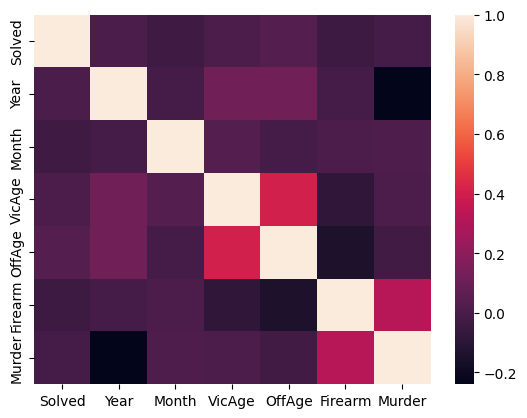

In [ ]:
# Correlation map
sn.heatmap(data.corr())

In [ ]:
data['County'].unique()

array(['Dane', 'Milwaukee', 'Bayfield', 'Brown', 'Ozaukee', 'Rock',
       'Chippewa', 'Jackson', 'Menominee', 'Sauk', 'Dodge', 'Walworth',
       'Outagamie', 'Racine', 'Adams', 'Forest', 'Langlade',
       'Trempealeau', 'Waukesha', 'Oneida', 'Washington', 'Juneau',
       'Wood', 'Eau Claire', 'Fond du Lac', 'Pierce', 'Sheboygan',
       'Kenosha', 'Marathon', 'Taylor', 'Jefferson', 'Pepin', 'Shawano',
       'La Crosse', 'Manitowoc', 'Washburn', 'Monroe', 'Vilas', 'Buffalo',
       'Grant', 'Price', 'Door', 'Barron', 'Kewaunee', 'Sawyer', 'Oconto',
       'Polk', 'Winnebago', 'Clark', 'Green Lake', 'Iron', 'Marinette',
       'St. Croix', 'Douglas', 'Waupaca', 'Columbia', 'Lincoln',
       'Burnett', 'Iowa', 'Vernon', 'Florence', 'Marquette', 'Ashland',
       'Richland', 'Lafayette', 'Green', 'Portage', 'Crawford',
       'Waushara', 'Calumet', 'Dunn', 'Rusk'], dtype=object)

# Splitting the data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop('Firearm', axis=1)  # Features are all the columns except for 'Firearm'
y = data['Firearm']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into testing and holdout sets (50% testing, 50% holdout)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assign variables for each set
training_set = (X_train, y_train)
testing_set = (X_test, y_test)
holdout_set = (X_holdout, y_holdout)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Holdout set:", X_holdout.shape, y_holdout.shape)


Training set: (2925, 10) (2925,)
Testing set: (366, 10) (366,)
Holdout set: (366, 10) (366,)


In [ ]:
# Print class distribution in the original DataFrame
print("Class Distribution in Original DataFrame:")
print(data['Firearm'].value_counts())

# Print total number of instances in the DataFrame
print("\nTotal Number of Instances in DataFrame:", len(data))

# Print number of instances in the training set
print("Number of Instances in Training Set:", len(training_set[0]))

Class Distribution in Original DataFrame:
1    2273
0    1384
Name: Firearm, dtype: int64

Total Number of Instances in DataFrame: 3657
Number of Instances in Training Set: 2925


In [8]:
from sklearn.preprocessing import OneHotEncoder

# Extract columns to be one-hot encoded
sex_race_data = data[['VicSex', 'VicRace', 'OffSex', 'OffRace']]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the columns
sex_race_encoded = encoder.fit_transform(sex_race_data)

# Create a DataFrame with the encoded columns
sex_race_encoded_df = pd.DataFrame(sex_race_encoded, columns=encoder.get_feature_names_out(['VicSex', 'VicRace', 'OffSex', 'OffRace']))

# Concatenate the encoded columns back to the original dataframe
data_encoded = pd.concat([data.drop(['VicSex', 'VicRace', 'OffSex', 'OffRace'], axis=1), sex_race_encoded_df], axis=1)

# Display the updated dataframe
print(data_encoded)


      Solved  Year  Month  VicAge  OffAge  Firearm  Murder  VicSex_F  \
0          1  2000      1       1       1        1       1       0.0   
1          1  2000      1       7       7        0       0       1.0   
2          1  2000      1       1       2        1       1       1.0   
3          1  2000      1       6       7        1       1       1.0   
4          1  2000      1       3       2        0       1       0.0   
...      ...   ...    ...     ...     ...      ...     ...       ...   
3652       1  2021     12       6       6        1       1       1.0   
3653       1  2021     12       3       2        1       1       0.0   
3654       1  2021     12       1       4        1       1       0.0   
3655       1  2021     12       5       5        0       1       1.0   
3656       1  2021     12       6       3        1       1       0.0   

      VicSex_M  VicSex_U  ...  VicRace_W  VicRace_nan  OffSex_F  OffSex_M  \
0          1.0       0.0  ...        0.0          0.0     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Naive Bayes on Training Set

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features (X) and target variable (y)
X = data_encoded.drop('Firearm', axis=1)  # Features are all the columns except for 'Firearm'
y = data_encoded['Firearm']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into testing and holdout sets (50% testing, 50% holdout)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assign variables for each set
training_set = (X_train, y_train)
testing_set = (X_test, y_test)
holdout_set = (X_holdout, y_holdout)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Holdout set:", X_holdout.shape, y_holdout.shape)

# Initialize the Naive Bayes classifier (Multinomial Naive Bayes)
naive_bayes_classifier = MultinomialNB()

# Fit the classifier to the training data
naive_bayes_classifier.fit(training_set[0], training_set[1])  # training_set[0] contains the features, training_set[1] contains the target variable

# Predict on the testing data
y_pred_naive_bayes = naive_bayes_classifier.predict(testing_set[0])  # testing_set[0] contains the features

# Evaluate the model on the testing set
accuracy_naive_bayes = accuracy_score(testing_set[1], y_pred_naive_bayes)
print(f"Accuracy of Naive Bayes on the testing set: {accuracy_naive_bayes:.2%}")

# Generate and print the classification report
class_report_naive_bayes = classification_report(testing_set[1], y_pred_naive_bayes)
print("Classification Report for Naive Bayes on Testing Set:\n", class_report_naive_bayes)

# Generate and print the confusion matrix
conf_matrix_naive_bayes = confusion_matrix(testing_set[1], y_pred_naive_bayes)
print("Confusion Matrix for Naive Bayes on Testing Set:\n", conf_matrix_naive_bayes)


Training set: (2925, 22) (2925,)
Testing set: (366, 22) (366,)
Holdout set: (366, 22) (366,)
Accuracy of Naive Bayes on the testing set: 70.22%
Classification Report for Naive Bayes on Testing Set:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       135
           1       0.76      0.77      0.77       231

    accuracy                           0.70       366
   macro avg       0.68      0.68      0.68       366
weighted avg       0.70      0.70      0.70       366

Confusion Matrix for Naive Bayes on Testing Set:
 [[ 78  57]
 [ 52 179]]


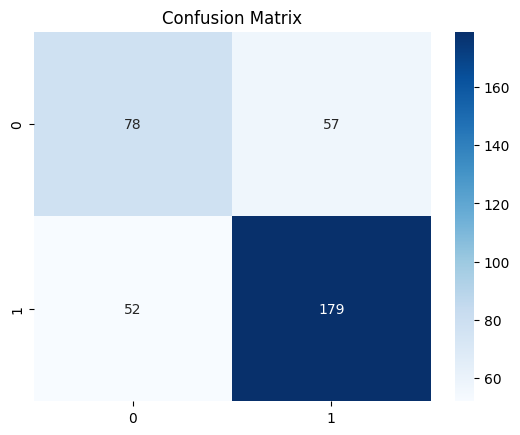

In [ ]:
sn.heatmap(confusion_matrix(testing_set[1], y_pred_naive_bayes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Class 0 represents "No firearm" and Class 1 represents "Firearm used"

## Decision tree Model on Training Set

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Define features (X) and target variable (y)
X = data_encoded.drop('Firearm', axis=1)  # Features are all the columns except for 'Firearm'
y = data_encoded['Firearm']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into testing and holdout sets (50% testing, 50% holdout)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assign variables for each set
training_set = (X_train, y_train)
testing_set = (X_test, y_test)
holdout_set = (X_holdout, y_holdout)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Holdout set:", X_holdout.shape, y_holdout.shape)

# Initialize the Decision Tree classifier with max_depth=3 and max_leaf_nodes=10
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=42)

# Fit the classifier to the training data
decision_tree_classifier.fit(training_set[0], training_set[1])

# Predict on the testing data
y_pred = decision_tree_classifier.predict(testing_set[0])

# Evaluate the model on the testing set
accuracy = accuracy_score(testing_set[1], y_pred)
print(f"Accuracy on the testing set: {accuracy:.2%}")

# Generate and print the classification report
class_report = classification_report(testing_set[1], y_pred)
print("Classification Report:\n", class_report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(testing_set[1], y_pred)
print("Confusion Matrix:\n", conf_matrix)

Training set: (2925, 22) (2925,)
Testing set: (366, 22) (366,)
Holdout set: (366, 22) (366,)
Accuracy on the testing set: 74.59%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.41      0.55       135
           1       0.73      0.94      0.82       231

    accuracy                           0.75       366
   macro avg       0.77      0.68      0.68       366
weighted avg       0.76      0.75      0.72       366

Confusion Matrix:
 [[ 56  79]
 [ 14 217]]


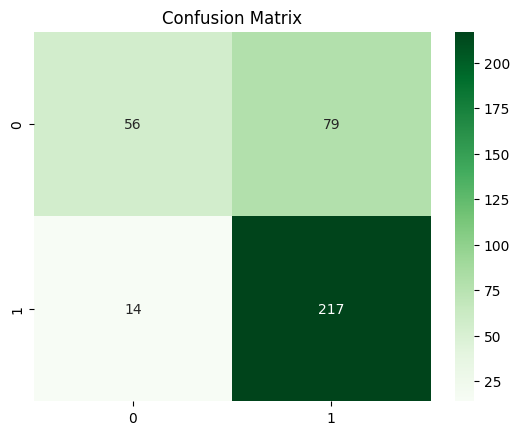

In [ ]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

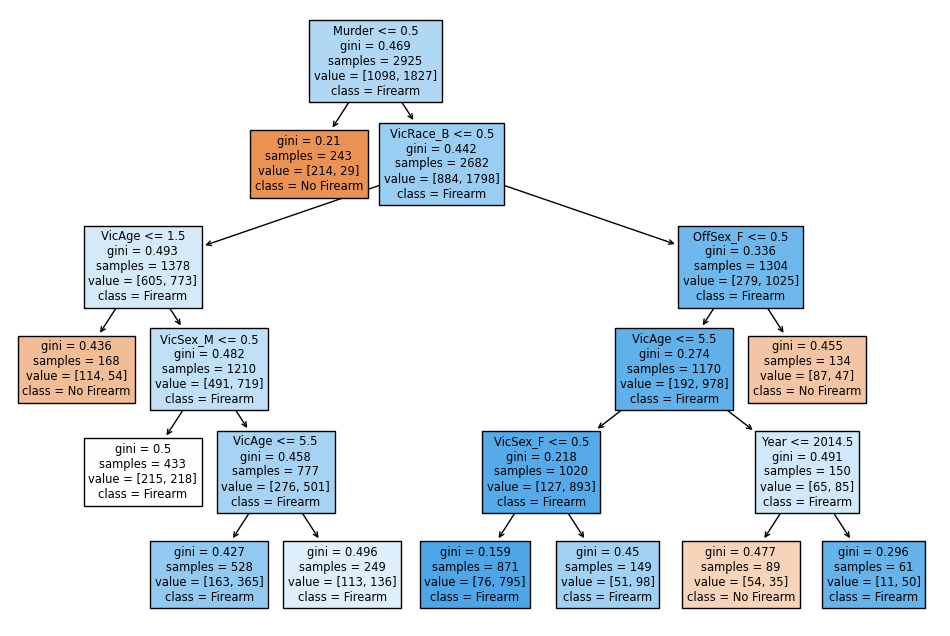

In [ ]:
from sklearn.tree import plot_tree

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_classifier, filled=True, feature_names=training_set[0].columns, class_names=['No Firearm', 'Firearm'])
plt.show()

# Model tweaking (Training Set)

In [ ]:
# Define features (X) and target variable (y)
X = data_encoded.drop('Firearm', axis=1)  # Features are all the columns except for 'Firearm'
y = data_encoded['Firearm']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into testing and holdout sets (50% testing, 50% holdout)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Assign variables for each set
training_set = (X_train, y_train)
testing_set = (X_test, y_test)
holdout_set = (X_holdout, y_holdout)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Holdout set:", X_holdout.shape, y_holdout.shape)

# Experiment with different values of max_depth and min_samples_leaf
max_depth_values = [5, 10, 20]
min_samples_leaf_values = [1, 5, 10]

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        # Initialize the Decision Tree classifier
        decision_tree_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)

        # Fit the classifier to the training data
        decision_tree_classifier.fit(training_set[0], training_set[1])

        # Predict on the testing data
        y_pred2 = decision_tree_classifier.predict(testing_set[0])

        # Evaluate the model on the testing set
        accuracy = accuracy_score(testing_set[1], y_pred2)
        print(f"Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}")
        print(f"Accuracy on the testing set: {accuracy:.2%}")

        # Generate and print the classification report
        class_report = classification_report(testing_set[1], y_pred2)
        print("Classification Report:\n", class_report)

        # Generate and print the confusion matrix
        conf_matrix = confusion_matrix(testing_set[1], y_pred2)
        print("Confusion Matrix:\n", conf_matrix)
        print("\n" + "="*50 + "\n")


Training set: (2925, 22) (2925,)
Testing set: (366, 22) (366,)
Holdout set: (366, 22) (366,)
Max Depth: 5, Min Samples Leaf: 1
Accuracy on the testing set: 77.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68       135
           1       0.80      0.86      0.83       231

    accuracy                           0.78       366
   macro avg       0.76      0.75      0.76       366
weighted avg       0.78      0.78      0.78       366

Confusion Matrix:
 [[ 87  48]
 [ 33 198]]


Max Depth: 5, Min Samples Leaf: 5
Accuracy on the testing set: 77.60%
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68       135
           1       0.80      0.86      0.83       231

    accuracy                           0.78       366
   macro avg       0.76      0.75      0.75       366
weighted avg       0.77      0.78      0.77       366

Confusion Matrix:
 [[

# Running the Model 1 on the Testing Set

In [23]:
# Predict on the testing data
y_pred_test = decision_tree_classifier.predict(testing_set[0])  # testing_set[0] contains the features

# Evaluate the model on the testing set
accuracy_test = accuracy_score(testing_set[1], y_pred_test)
print(f"Accuracy on the testing set: {accuracy_test:.2%}")

# Generate and print the classification report
class_report_test = classification_report(testing_set[1], y_pred_test)
print("Classification Report on Testing Set:\n", class_report_test)

# Generate and print the confusion matrix
conf_matrix_test = confusion_matrix(testing_set[1], y_pred_test)
print("Confusion Matrix on Testing Set:\n", conf_matrix_test)


Accuracy on the testing set: 74.59%
Classification Report on Testing Set:
               precision    recall  f1-score   support

           0       0.80      0.41      0.55       135
           1       0.73      0.94      0.82       231

    accuracy                           0.75       366
   macro avg       0.77      0.68      0.68       366
weighted avg       0.76      0.75      0.72       366

Confusion Matrix on Testing Set:
 [[ 56  79]
 [ 14 217]]


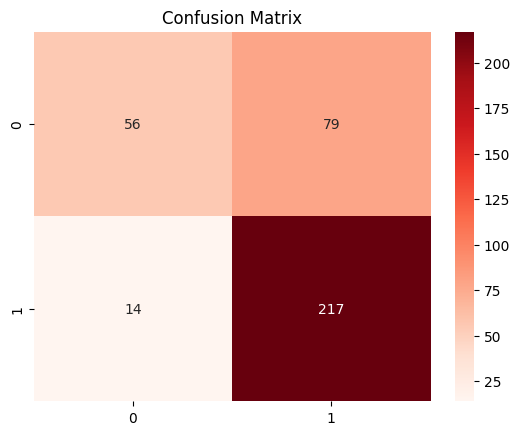

In [24]:
sn.heatmap(confusion_matrix(testing_set[1], y_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

# Model assessment on the Holdout Set

In [ ]:
# Predict on the holdout data
y_pred_holdout = decision_tree_classifier.predict(holdout_set[0])  # holdout_set[0] contains the features

# Evaluate the model on the holdout set
accuracy_holdout = accuracy_score(holdout_set[1], y_pred_holdout)
print(f"Accuracy on the holdout set: {accuracy_holdout:.2%}")

# Generate and print the classification report
class_report_holdout = classification_report(holdout_set[1], y_pred_holdout)
print("Classification Report on Holdout Set:\n", class_report_holdout)

# Generate and print the confusion matrix
conf_matrix_holdout = confusion_matrix(holdout_set[1], y_pred_holdout)
print("Confusion Matrix on Holdout Set:\n", conf_matrix_holdout)


Accuracy on the holdout set: 71.58%
Classification Report on Holdout Set:
               precision    recall  f1-score   support

           0       0.67      0.60      0.64       151
           1       0.74      0.80      0.77       215

    accuracy                           0.72       366
   macro avg       0.71      0.70      0.70       366
weighted avg       0.71      0.72      0.71       366

Confusion Matrix on Holdout Set:
 [[ 91  60]
 [ 44 171]]


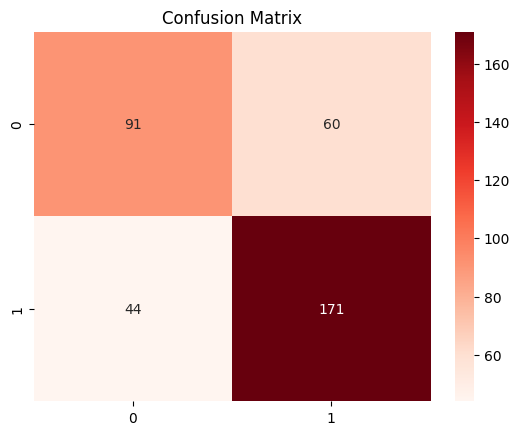

In [ ]:
sn.heatmap(confusion_matrix(holdout_set[1], y_pred_holdout), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression on the Training Set

In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logistic_regression_model.fit(training_set[0], training_set[1])  # training_set[0] contains the features, training_set[1] contains the target variable

# Predict on the testing data
y_pred_logistic = logistic_regression_model.predict(testing_set[0])  # testing_set[0] contains the features

# Evaluate the model on the testing set
accuracy_logistic = accuracy_score(testing_set[1], y_pred_logistic)
print(f"Accuracy of Logistic Regression on the testing set: {accuracy_logistic:.2%}")

# Generate and print the classification report
class_report_logistic = classification_report(testing_set[1], y_pred_logistic)
print("Classification Report for Logistic Regression on Testing Set:\n", class_report_logistic)

# Generate and print the confusion matrix
conf_matrix_logistic = confusion_matrix(testing_set[1], y_pred_logistic)
print("Confusion Matrix for Logistic Regression on Testing Set:\n", conf_matrix_logistic)


Accuracy of Logistic Regression on the testing set: 75.68%
Classification Report for Logistic Regression on Testing Set:
               precision    recall  f1-score   support

           0       0.70      0.60      0.65       135
           1       0.78      0.85      0.81       231

    accuracy                           0.76       366
   macro avg       0.74      0.72      0.73       366
weighted avg       0.75      0.76      0.75       366

Confusion Matrix for Logistic Regression on Testing Set:
 [[ 81  54]
 [ 35 196]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


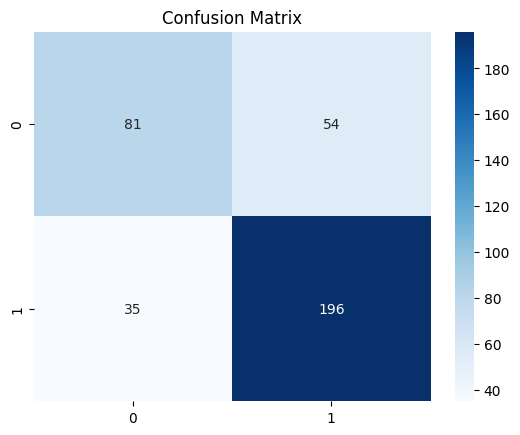

In [19]:
sn.heatmap(confusion_matrix(testing_set[1], y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


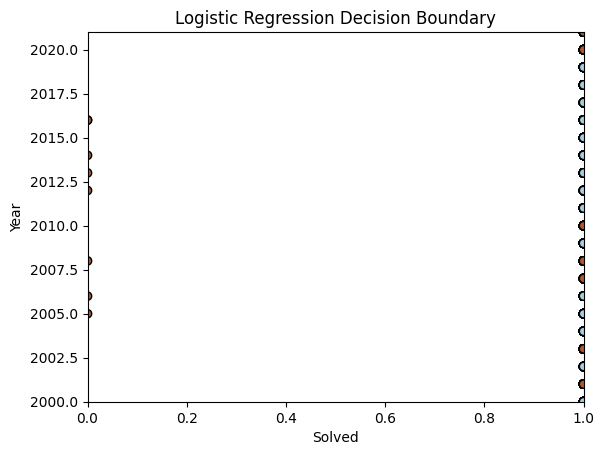

In [ ]:
# Select two features for visualization (modify as needed)
feature1 = 'Solved'
feature2 = 'Year'

# Extract the selected features
X_vis = training_set[0][[feature1, feature2]]

# Fit logistic regression on the selected features
logistic_regression_model_vis = LogisticRegression(random_state=42)
logistic_regression_model_vis.fit(X_vis, training_set[1])

# Create a meshgrid for plotting the decision boundary
xx, yy = np.meshgrid(np.linspace(X_vis[feature1].min(), X_vis[feature1].max(), 100),
                     np.linspace(X_vis[feature2].min(), X_vis[feature2].max(), 100))

# Predict probabilities for each point in the meshgrid
probs = logistic_regression_model_vis.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
probs = probs.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, probs, levels=[.5], cmap="RdBu", vmin=0, vmax=1)
plt.scatter(X_vis[feature1], X_vis[feature2], c=training_set[1], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Logistic Regression Decision Boundary")
plt.show()


# Logistic Regression Model Tweaking

In [16]:
# Additional submodel 1: Adjust regularization strength
logistic_regression_model_1 = LogisticRegression(C=0.1, random_state=42)
logistic_regression_model_1.fit(training_set[0], training_set[1])
y_pred_logistic_1 = logistic_regression_model_1.predict(testing_set[0])
accuracy_logistic_1 = accuracy_score(testing_set[1], y_pred_logistic_1)
print(f"\nAccuracy of Logistic Regression (C=0.1) on the testing set: {accuracy_logistic_1:.2%}")

# Additional submodel 2: Change the solver
logistic_regression_model_2 = LogisticRegression(solver='liblinear', random_state=42)
logistic_regression_model_2.fit(training_set[0], training_set[1])
y_pred_logistic_2 = logistic_regression_model_2.predict(testing_set[0])
accuracy_logistic_2 = accuracy_score(testing_set[1], y_pred_logistic_2)
print(f"\nAccuracy of Logistic Regression (Solver='liblinear') on the testing set: {accuracy_logistic_2:.2%}")



Accuracy of Logistic Regression (C=0.1) on the testing set: 75.41%

Accuracy of Logistic Regression (Solver='liblinear') on the testing set: 74.32%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Original model
print("\nOriginal Logistic Regression Model:")
print("------------------------------------------------------")
y_pred_logistic = logistic_regression_model.predict(testing_set[0])
accuracy_logistic = accuracy_score(testing_set[1], y_pred_logistic)
print(f"Accuracy: {accuracy_logistic:.2%}")
print("Classification Report:\n", classification_report(testing_set[1], y_pred_logistic))
conf_matrix_logistic = confusion_matrix(testing_set[1], y_pred_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)

# Additional submodel 1
print("\nLogistic Regression Model (C=0.1):")
print("------------------------------------------------------")
y_pred_logistic_1 = logistic_regression_model_1.predict(testing_set[0])
accuracy_logistic_1 = accuracy_score(testing_set[1], y_pred_logistic_1)
print(f"Accuracy: {accuracy_logistic_1:.2%}")
print("Classification Report:\n", classification_report(testing_set[1], y_pred_logistic_1))
conf_matrix_logistic_1 = confusion_matrix(testing_set[1], y_pred_logistic_1)
print("Confusion Matrix:\n", conf_matrix_logistic_1)

# Additional submodel 2
print("\nLogistic Regression Model (Solver='liblinear'):")
print("------------------------------------------------------")
y_pred_logistic_2 = logistic_regression_model_2.predict(testing_set[0])
accuracy_logistic_2 = accuracy_score(testing_set[1], y_pred_logistic_2)
print(f"Accuracy: {accuracy_logistic_2:.2%}")
print("Classification Report:\n", classification_report(testing_set[1], y_pred_logistic_2))
conf_matrix_logistic_2 = confusion_matrix(testing_set[1], y_pred_logistic_2)
print("Confusion Matrix:\n", conf_matrix_logistic_2)



Original Logistic Regression Model:
------------------------------------------------------
Accuracy: 75.68%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.60      0.65       135
           1       0.78      0.85      0.81       231

    accuracy                           0.76       366
   macro avg       0.74      0.72      0.73       366
weighted avg       0.75      0.76      0.75       366

Confusion Matrix:
 [[ 81  54]
 [ 35 196]]

Logistic Regression Model (C=0.1):
------------------------------------------------------
Accuracy: 75.41%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64       135
           1       0.78      0.85      0.81       231

    accuracy                           0.75       366
   macro avg       0.74      0.72      0.73       366
weighted avg       0.75      0.75      0.75       366

Confusion Matrix:
 [[ 80  55]
 [ 35 196

# Applying the original Regression Model to the Testing Set

In [18]:
# Apply the original logistic regression model to the testing set
y_pred_original = logistic_regression_model.predict(testing_set[0])

# Evaluate the performance on the testing set
accuracy_original = accuracy_score(testing_set[1], y_pred_original)
print("\nOriginal Logistic Regression Model (Applied to Testing Set):")
print("------------------------------------------------------")
print(f"Accuracy: {accuracy_original:.2%}")
print("Classification Report:\n", classification_report(testing_set[1], y_pred_original))
conf_matrix_original = confusion_matrix(testing_set[1], y_pred_original)
print("Confusion Matrix:\n", conf_matrix_original)



Original Logistic Regression Model (Applied to Testing Set):
------------------------------------------------------
Accuracy: 75.68%
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.60      0.65       135
           1       0.78      0.85      0.81       231

    accuracy                           0.76       366
   macro avg       0.74      0.72      0.73       366
weighted avg       0.75      0.76      0.75       366

Confusion Matrix:
 [[ 81  54]
 [ 35 196]]


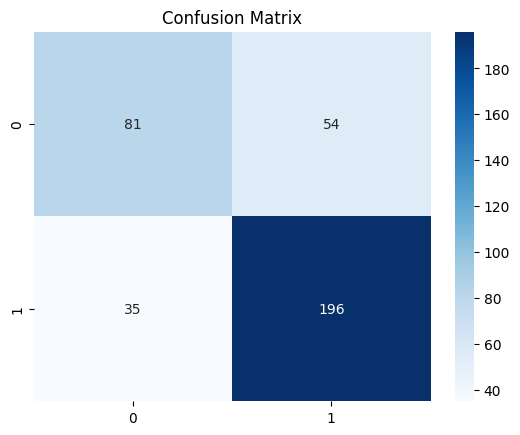

In [20]:
sn.heatmap(confusion_matrix(testing_set[1], y_pred_original), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Apply the original logistic regression model to the holdout set
y_pred_original_holdout = logistic_regression_model.predict(holdout_set[0])

# Evaluate the performance on the holdout set for the original model
accuracy_original_holdout = accuracy_score(holdout_set[1], y_pred_original_holdout)
print("\nOriginal Logistic Regression Model (Applied to Holdout Set):")
print("------------------------------------------------------")
print(f"Accuracy: {accuracy_original_holdout:.2%}")
print("Classification Report:\n", classification_report(holdout_set[1], y_pred_original_holdout))
conf_matrix_original_holdout = confusion_matrix(holdout_set[1], y_pred_original_holdout)
print("Confusion Matrix:\n", conf_matrix_original_holdout)

# Apply the selected submodel (e.g., logistic_regression_model_1) to the holdout set
y_pred_selected_holdout = logistic_regression_model_1.predict(holdout_set[0])

# Evaluate the performance on the holdout set for the selected submodel
accuracy_selected_holdout = accuracy_score(holdout_set[1], y_pred_selected_holdout)
print("\nSelected Logistic Regression Model (Applied to Holdout Set):")
print("------------------------------------------------------")
print(f"Accuracy: {accuracy_selected_holdout:.2%}")
print("Classification Report:\n", classification_report(holdout_set[1], y_pred_selected_holdout))
conf_matrix_selected_holdout = confusion_matrix(holdout_set[1], y_pred_selected_holdout)
print("Confusion Matrix:\n", conf_matrix_selected_holdout)



Original Logistic Regression Model (Applied to Holdout Set):
------------------------------------------------------
Accuracy: 73.22%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.55      0.63       151
           1       0.73      0.86      0.79       215

    accuracy                           0.73       366
   macro avg       0.73      0.71      0.71       366
weighted avg       0.73      0.73      0.72       366

Confusion Matrix:
 [[ 83  68]
 [ 30 185]]

Selected Logistic Regression Model (Applied to Holdout Set):
------------------------------------------------------
Accuracy: 73.22%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.54      0.63       151
           1       0.73      0.87      0.79       215

    accuracy                           0.73       366
   macro avg       0.73      0.70      0.71       366
weighted avg       0.73      0.73      0.72

# K-Means clustering on the Training Set

In [ ]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with the desired number of clusters
num_clusters = 2  # You can adjust this based on your requirements
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the training data
kmeans_model.fit(training_set[0])  # training_set[0] contains the features

# Predict cluster labels for the testing data
cluster_labels = kmeans_model.predict(testing_set[0])  # testing_set[0] contains the features

# Note: K-Means is an unsupervised algorithm, so it doesn't predict the target variable directly.
# Instead, it assigns each data point to a cluster.

# (Optional) Assess the quality of clustering, e.g., using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(testing_set[0], cluster_labels)
print(f"Silhouette Score for K-Means Clustering: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K-Means Clustering: 0.44812783221918784


# Comparing the Models

comparison of the three models (Decision Tree with max_depth=3 and max_leaf_nodes=10, Logistic Regression, and K-Means Clustering) based on accuracy:

In [ ]:
y_true = testing_set[1]
y_pred_tree = decision_tree_classifier.predict(testing_set[0])
y_pred_logistic = logistic_regression_model.predict(testing_set[0])

# Evaluate K-Means clustering
# For K-Means, we use silhouette score as it's an unsupervised method
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(testing_set[0], kmeans_model.predict(testing_set[0]))

# Print the accuracy for each model
print(f"Decision Tree Accuracy: {accuracy_score(y_true, y_pred_tree):.2%}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_true, y_pred_logistic):.2%}")
print(f"K-Means Silhouette Score: {silhouette_avg:.2f}")


Decision Tree Accuracy: 73.50%
Logistic Regression Accuracy: 75.68%
K-Means Silhouette Score: 0.45


## NLP

Natural Language Processing (NLP):
    Text Analysis from Categorical Columns:
    Analyzing 'Weapon', 'Relationship'

Using 'wisc' df

In [ ]:
# Load the CSV file
wisc = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/wisc.csv')

Handgun - pistol, revolver, etc         1998
Firearm, type not stated                 853
Knife or cutting instrument              486
Other or type unknown                    392
Personal weapons, includes beating       302
Rifle                                    176
Blunt object - hammer, club, etc         131
Shotgun                                  117
Narcotics or drugs, sleeping pills       110
Asphyxiation - includes death by gas      97
Name: Weapon, dtype: int64


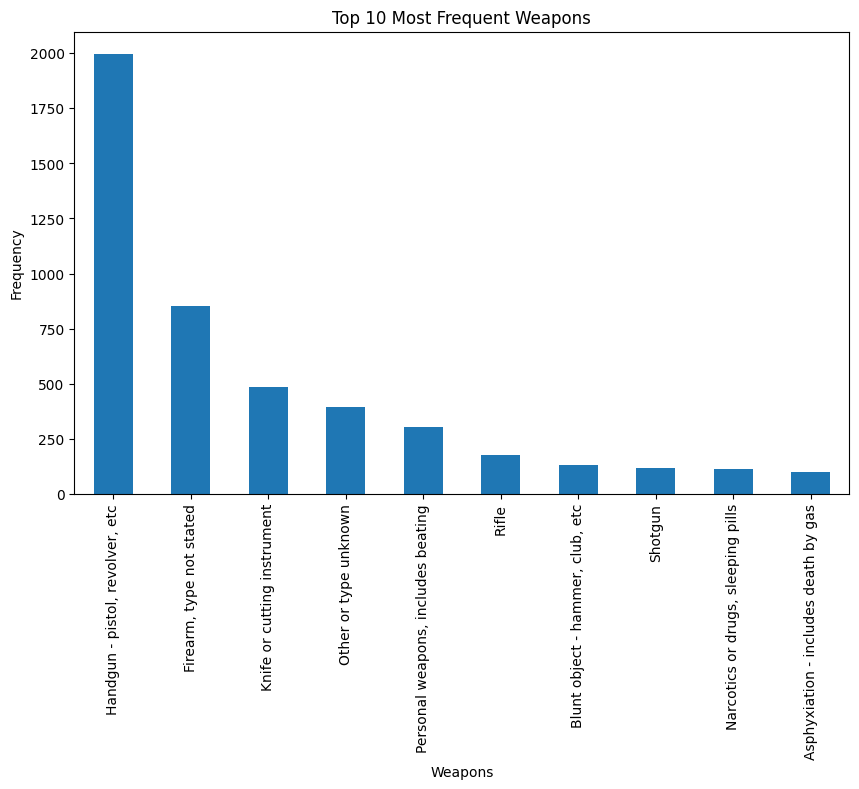

In [ ]:
weapon_frequency = wisc['Weapon'].value_counts()

# Display the top 10 most frequent weapons
top_10_weapons = weapon_frequency.head(10)
print(top_10_weapons)

# Plotting a bar chart for weapons
top_10_weapons.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Frequent Weapons')
plt.xlabel('Weapons')
plt.ylabel('Frequency')
plt.show()


Relationship not determined    1845
Stranger                        769
Acquaintance                    639
Other - known to victim         318
Friend                          191
Girlfriend                      175
Wife                            139
Son                             131
Other family                     90
Daughter                         86
Name: Relationship, dtype: int64


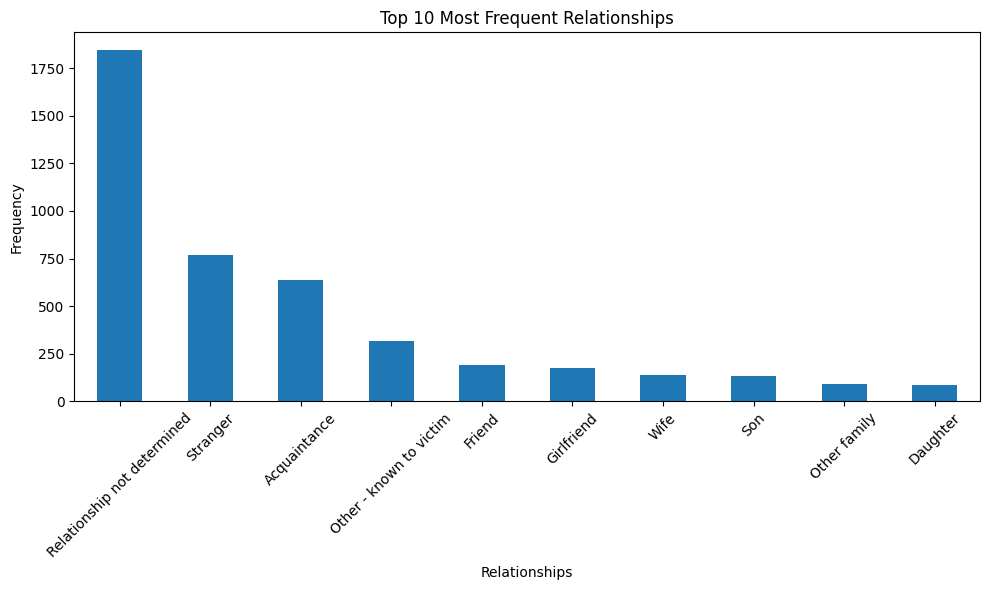

In [ ]:
relationship_frequency = wisc['Relationship'].value_counts()

# Display the top 10 most frequent relationships
top_10_relationships = relationship_frequency.head(10)
print(top_10_relationships)

# Plotting a bar chart for relationships with rotated x-labels
top_10_relationships.plot(kind='bar', figsize=(10, 6)
                         ).set_xticklabels(top_10_relationships.index, rotation=45)
plt.title('Top 10 Most Frequent Relationships')
plt.xlabel('Relationships')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
# Sentiment Analysis
from textblob import TextBlob

sentiments = wisc['Weapon'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
wisc['Sentiment'] = sentiments

# Check the sentiments for each text
print(wisc[['Weapon', 'Sentiment']])


                                  Weapon  Sentiment
480763   Handgun - pistol, revolver, etc     0.0000
480764             Other or type unknown    -0.1125
480765       Knife or cutting instrument    -0.6000
480766   Handgun - pistol, revolver, etc     0.0000
480910   Handgun - pistol, revolver, etc     0.0000
...                                  ...        ...
847720             Other or type unknown    -0.1125
847728          Firearm, type not stated     0.0000
847736  Blunt object - hammer, club, etc     0.0000
847745          Firearm, type not stated     0.0000
847754          Firearm, type not stated     0.0000

[4728 rows x 2 columns]


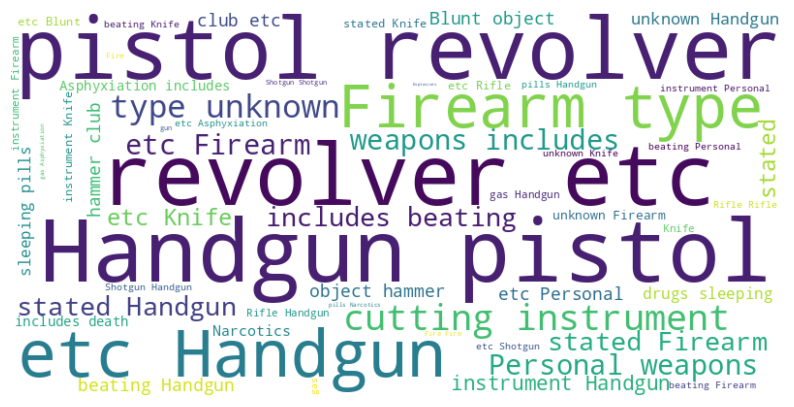

In [ ]:
from wordcloud import WordCloud
# Wordcloud
text_combined = ' '.join(wisc['Weapon'])  # Combine all texts into a single string

wordcloud = WordCloud(width = 800, height = 400, random_state=42, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Need some extra pre processing for 'Relationship'

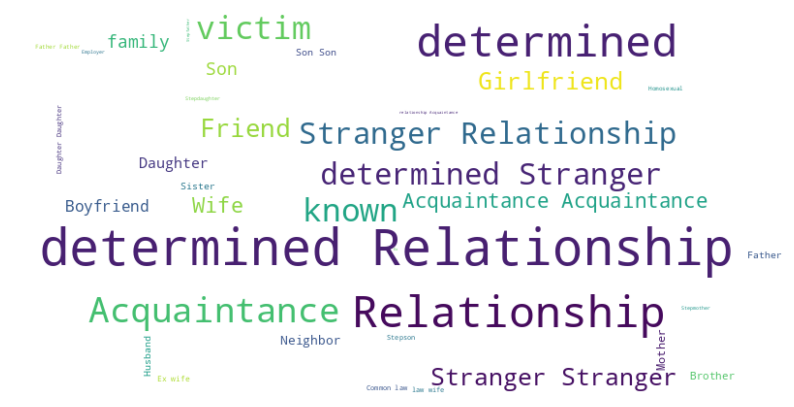

In [ ]:
text_combined = ' '.join(wisc['Relationship'])  # Combine all texts into a single string

wordcloud = WordCloud(width = 800, height = 400, random_state=42, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()